In [1]:
import tensorflow as tf 
import cv2
import numpy as np 
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPool2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop

In [2]:
fldr="./UTKFace"

In [3]:
import os
files=os.listdir(fldr)

In [4]:
import cv2

ages = []
genders = []
images = []

for fle in files:
    age = int(fle.split('_')[0])
    gender = int(fle.split('_')[1])
    total = fldr + '/' + fle
    print(total)
    image = cv2.imread(total)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (48, 48))
    images.append(image)

./UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
./UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
./UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
./UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
./UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
./UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
./UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
./UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
./UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
./UTKFace/101_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/101_1_2_20170105174739309.jpg.chip.jpg
./UTKFace/103_0_2_20170112213001988.jpg.chip.jpg
./UTKFace/105_0_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213021902.jpg.chip.jpg
./UTKFace/105_1_0_20170112213507183.jpg.chip.jpg
./UTKFace/105_1_1_20170112213303693.jpg.chip.jpg
./UTKFace/10_0_0_20161220222308131.jpg.chip.jpg
./UTKFace/10_0_0_2017

In [5]:
for fle in files:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

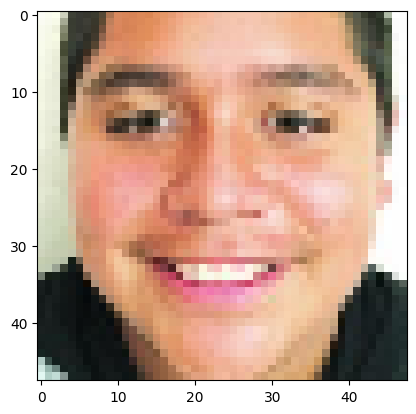

In [6]:
plt.imshow(images[700])

In [7]:
print(ages[700])

15


In [8]:
print(genders[700])

0


In [9]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(gender)

In [10]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy', ages_f)
np.save(fldr+'genders.npy',genders_f)

In [11]:
values,counts=np.unique(genders_f,return_counts=True)
print(counts)


[1]


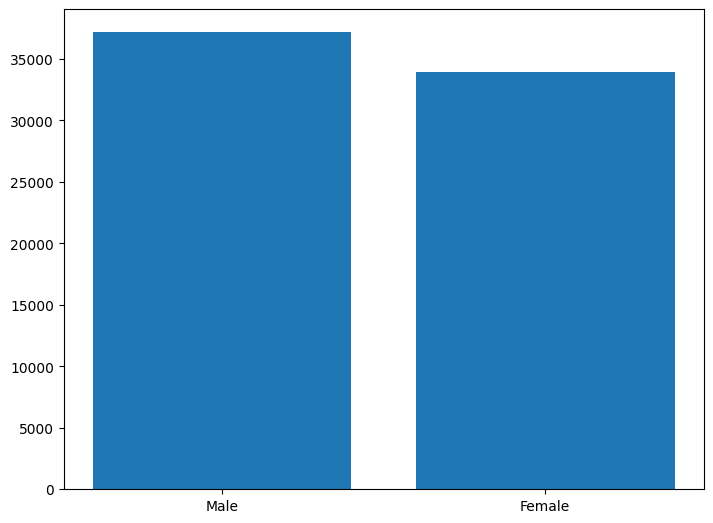

In [12]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[37173,33951]
ax.bar(gender,values)
plt.show()

In [13]:
values, counts=np.unique(ages_f,return_counts=True)
print(counts)


[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [14]:
val=values.tolist()
cnt=counts.tolist()

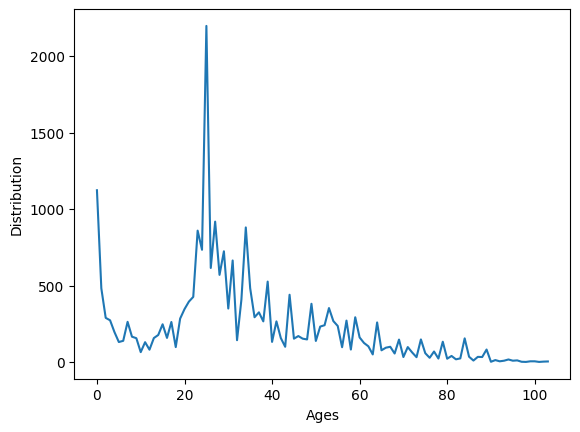

In [15]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

In [16]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

In [17]:
images_f_2=images_f/255

In [18]:
images_f_2.shape

(23708, 48, 48, 3)

In [19]:
labels_f=np.array(labels)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,X_test,Y_train,Y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [22]:
Y_train[0:5]

array([[ 6,  1],
       [26,  0],
       [20,  1],
       [ 2,  1],
       [ 1,  1]])

In [23]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [24]:
Y_train_2[0][0:5]

array([1, 0, 1, 1, 1])

In [25]:
Y_train_2[1][0:5]

array([ 6, 26, 20,  2,  1])

In [26]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

def Convolution(input_tensor, filters):
    x = Conv2D(filters=filters, kernel_size=(3, 3), padding="same", strides=(1, 1), kernel_regularizer=tf.keras.regularizers.L2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x = Activation('relu')(x)
    return x

In [27]:
def model(input_shape):
    inputs = Input((input_shape))
    conv_1 = Convolution(inputs, 32)
    maxp_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
    conv_2 = Convolution(maxp_1, 64)
    maxp_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
    conv_3 = Convolution(maxp_2, 128)
    maxp_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
    conv_4 = Convolution(maxp_3, 256)
    maxp_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)
    conv_5 = Convolution(maxp_4, 512)
    maxp_5 = MaxPooling2D(pool_size=(2, 2))(conv_5)
    flatten = Flatten()(maxp_5)
    dense_1 = Dense(64, activation='relu')(flatten)
    dense_2 = Dense(64, activation='relu')(flatten)
    drop_1 = Dropout(0.2)(dense_1)  # Fixed the dropout typo
    drop_2 = Dropout(0.2)(dense_2)  # Fixed the dropout typo
    output_1 = Dense(1, activation='sigmoid', name='sex_out')(drop_1)
    output_2 = Dense(1, activation='relu', name='age_out')(drop_2)
    model = Model(inputs=[inputs], outputs=[output_1, output_2])
    model.compile(loss=["binary_crossentropy", "mae"], optimizer="Adam", metrics=["accuracy"])
    return model

In [28]:
Model=model((48,48,3))

In [29]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 48, 48, 32)           896       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 48, 48, 32)           0         ['conv2d[0][0]']              
                                                                                                  
 activation (Activation)     (None, 48, 48, 32)           0         ['dropout[0][0]']             
                                                                                              

In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [31]:
fle_s='/kaggle/working/Age_Sex_Detection.h5'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

In [32]:
History=Model.fit(x_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=250,callbacks=callback_list)

Epoch 1/250


278/278 [==============================] - ETA: 0s - loss: 16.9087 - sex_out_loss: 0.7184 - age_out_loss: 15.9234 - sex_out_accuracy: 0.5238 - age_out_accuracy: 0.0471
Epoch 1: val_loss improved from inf to 15.79851, saving model to /kaggle/working\Age_Sex_Detection.h5


C:\Users\Makizharasu M\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


278/278 [==============================] - 95s 319ms/step - loss: 16.9087 - sex_out_loss: 0.7184 - age_out_loss: 15.9234 - sex_out_accuracy: 0.5238 - age_out_accuracy: 0.0471 - val_loss: 15.7985 - val_sex_out_loss: 0.6774 - val_age_out_loss: 14.9008 - val_sex_out_accuracy: 0.5259 - val_age_out_accuracy: 0.0471
Epoch 2/250
278/278 [==============================] - ETA: 0s - loss: 13.5828 - sex_out_loss: 0.6243 - age_out_loss: 12.6920 - sex_out_accuracy: 0.6619 - age_out_accuracy: 0.0461
Epoch 2: val_loss improved from 15.79851 to 13.34152, saving model to /kaggle/working\Age_Sex_Detection.h5
278/278 [==============================] - 86s 308ms/step - loss: 13.5828 - sex_out_loss: 0.6243 - age_out_loss: 12.6920 - sex_out_accuracy: 0.6619 - age_out_accuracy: 0.0461 - val_loss: 13.3415 - val_sex_out_loss: 0.5776 - val_age_out_loss: 12.4495 - val_sex_out_accuracy: 0.7079 - val_age_out_accuracy: 0.0290
Epoch 3/250
278/278 [==============================] - ETA: 0s - loss: 11.1217 - sex_out_

In [33]:
Model.evaluate(X_test,Y_test_2)

186/186 [==============================] - 5s 25ms/step - loss: 7.3414 - sex_out_loss: 0.2293 - age_out_loss: 6.2384 - sex_out_accuracy: 0.8967 - age_out_accuracy: 0.0452


[7.3413920402526855,
 0.22933319211006165,
 6.238375663757324,
 0.8967437148094177,
 0.04521680623292923]

In [34]:
pred=Model.predict(X_test)

186/186 [==============================] - 5s 23ms/step


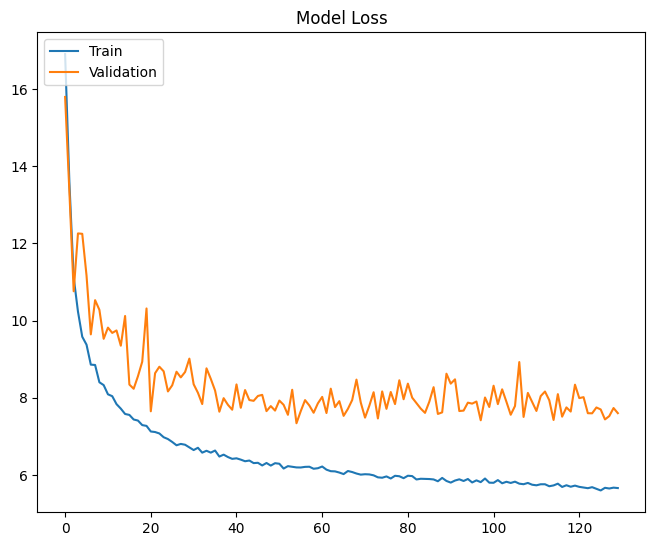

In [35]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

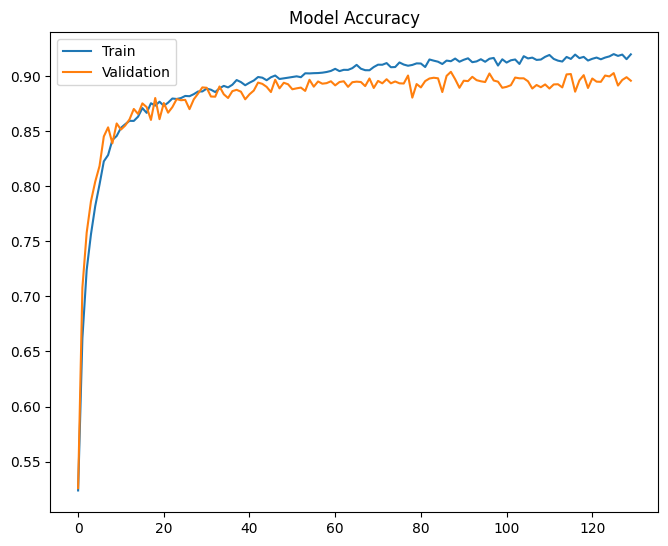

In [36]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

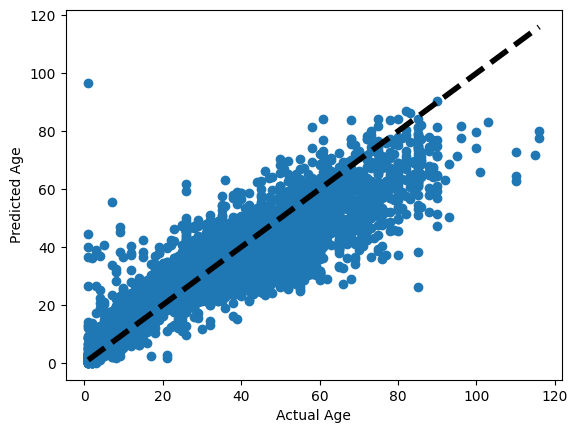

In [37]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

In [38]:
i=0
pred_1=[]
while(i<len(pred[0])):
    pred_1.append(int(np.round(pred[0][i])))
    i=i+1

C:\Users\Makizharasu M\AppData\Local\Temp\ipykernel_15632\463674450.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_1.append(int(np.round(pred[0][i])))


In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [40]:
report=classification_report(Y_test_2[0],pred_1)

In [41]:
print(report)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      3114
           1       0.90      0.88      0.89      2813

    accuracy                           0.90      5927
   macro avg       0.90      0.90      0.90      5927
weighted avg       0.90      0.90      0.90      5927



In [42]:
results=confusion_matrix(Y_test_2[0],pred_1)

<Axes: >

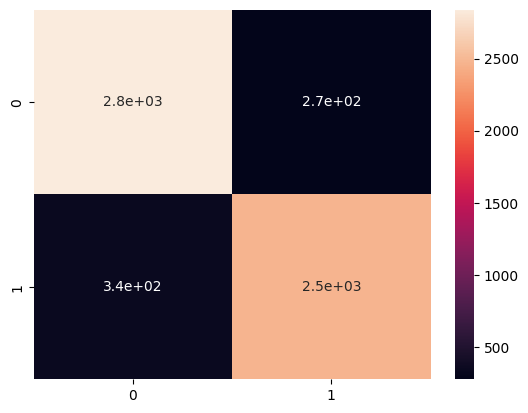

In [43]:
import seaborn as sns
sns.heatmap(results,annot=True)

In [44]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_1=Model.predict(np.array([image_test]))
    sex_f=['Male','female']
    age=int(np.round(pred_1[1][0]))
    sex=int(np.round(pred_1[0][0]))
    print("Predicted Age is "+ str(age))
    print("Predicted Gender is "+ sex_f[sex])

1/1 [==============================] - 0s 21ms/step
Predicted Age is 10
Predicted Gender is Male


C:\Users\Makizharasu M\AppData\Local\Temp\ipykernel_15632\2765585422.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_1[1][0]))
C:\Users\Makizharasu M\AppData\Local\Temp\ipykernel_15632\2765585422.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_1[0][0]))


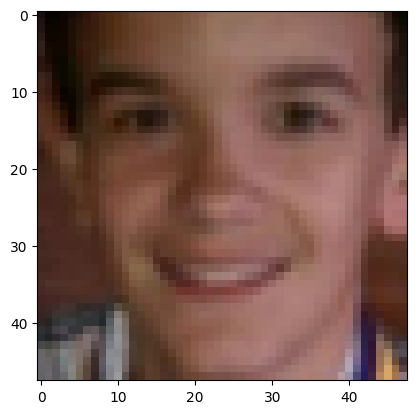

In [45]:
test_image(23,images_f,images_f_2,Model)

In [46]:
def is_child(age):
    return age < 18

In [47]:
def test_image_with_child_detection(ind, images_f, images_f_2, Model):
    plt.imshow(images_f[ind])
    image_test = images_f_2[ind]
    pred_1 = Model.predict(np.array([image_test]))
    sex_f = ['Male', 'Female']
    age = int(np.round(pred_1[1][0]))
    sex = int(np.round(pred_1[0][0]))
    
    if is_child(age):
        print("The detected person is a child.")
    else:
        print("The detected person is not a child.")
    

1/1 [==============================] - 0s 26ms/step
The detected person is a child.


C:\Users\Makizharasu M\AppData\Local\Temp\ipykernel_15632\3248114426.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(pred_1[1][0]))
C:\Users\Makizharasu M\AppData\Local\Temp\ipykernel_15632\3248114426.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex = int(np.round(pred_1[0][0]))


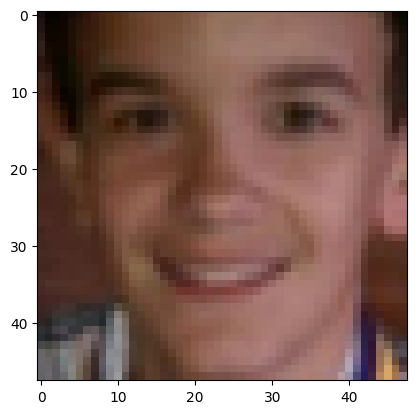

In [48]:
test_image_with_child_detection(23, images_f, images_f_2, Model)

1/1 [==============================] - 0s 29ms/step
The detected person is a child.


C:\Users\Makizharasu M\AppData\Local\Temp\ipykernel_15632\3248114426.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(pred_1[1][0]))
C:\Users\Makizharasu M\AppData\Local\Temp\ipykernel_15632\3248114426.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex = int(np.round(pred_1[0][0]))


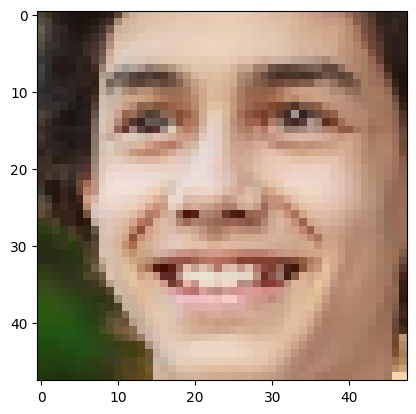

In [49]:
test_image_with_child_detection(100, images_f, images_f_2, Model)

1/1 [==============================] - 0s 27ms/step
The detected person is not a child.


C:\Users\Makizharasu M\AppData\Local\Temp\ipykernel_15632\3248114426.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(pred_1[1][0]))
C:\Users\Makizharasu M\AppData\Local\Temp\ipykernel_15632\3248114426.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex = int(np.round(pred_1[0][0]))


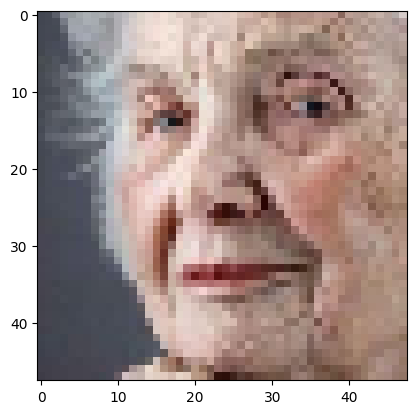

In [50]:
test_image_with_child_detection(4, images_f, images_f_2, Model)

In [52]:
def load_image():
    file_path = filedialog.askopenfilename()
    image = cv2.imread(file_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (48, 48))
    return image

In [53]:
def predict_child():
    image = load_image()
    image = image / 255.0
    image = np.expand_dims(image, axis=0)
    
    prediction = Model.predict(image)
    age = int(np.round(prediction[0][0]))

    if is_child(age):
        result_label.config(text="Child detected!")
    else:
        result_label.config(text="Not a child. Age: {}".format(age))

In [54]:
def browse_image():
    image = load_image()
    image = Image.fromarray(image)
    image = ImageTk.PhotoImage(image)

    panel = tk.Label(root, image=image)
    panel.image = image
    panel.grid(row=1, column=0, columnspan=3)

In [56]:

import tkinter as tk

root = tk.Tk()
root.title("Child Detector")

browse_button = tk.Button(root, text="Browse Image", command=browse_image)
browse_button.grid(row=0, column=0, columnspan=3)

detect_button = tk.Button(root, text="Detect Child", command=predict_child)
detect_button.grid(row=2, column=0, columnspan=3)

result_label = tk.Label(root, text="")
result_label.grid(row=3, column=0, columnspan=3)

root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\Makizharasu M\AppData\Local\Temp\ipykernel_15632\3720337891.py", line 2, in predict_child
    image = load_image()
  File "C:\Users\Makizharasu M\AppData\Local\Temp\ipykernel_15632\2781071697.py", line 2, in load_image
    file_path = filedialog.askopenfilename()
NameError: name 'filedialog' is not defined
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\Makizharasu M\AppData\Local\Temp\ipykernel_15632\1248948214.py", line 2, in browse_image
    image = load_image()
  File "C:\Users\Makizharasu M\AppData\Local\Temp\